In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
# camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
# sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.2.0 installed at /mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/site-packages/camb


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('dark_background')

In [4]:
from munch import Munch

In [5]:
cos_pars = Munch()
cos_pars.Om0, cos_pars.Ode0, cos_pars.Ob0, cos_pars.h, cos_pars.ns, cos_pars.sig8 = (0.306, 0.694, 0.0484, 0.678, 0.9677, 0.815)

In [6]:
# from astropy.cosmology import FlatLambdaCDM

In [7]:
# cosmo = FlatLambdaCDM(cos_pars.h*100, cos_pars.Om0)

In [8]:
cos_pars.Ombh2 = (cos_pars.Ob0)*cos_pars.h**2
cos_pars.Omch2 = (cos_pars.Om0-cos_pars.Ob0)*cos_pars.h**2

In [9]:
# 0.674**2* 0.315

In [10]:
#Now get matter power spectra and sigma8 at redshift 0 and 0.8
pars = camb.CAMBparams(redshifts=[0., 1])
pars.set_cosmology(H0=cos_pars.h*100, ombh2=cos_pars.Ombh2, omch2=cos_pars.Omch2)
pars.InitPower.set_params(ns=cos_pars.ns)
#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0., 1], kmax=10.0)

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-3, maxkh=10, npoints = 200)
s8 = np.array(results.get_sigma8())

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
pars.NonLinearModel.set_params(halofit_version='original')
# pars.halofit_version='mead2020'
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-3, maxkh=10, npoints = 200)

Note: redshifts have been re-sorted (earliest first)


In [11]:
print(results.get_sigma8())

[0.48047966 0.78758287]


In [12]:
# results.get_matter_power_interpolator()

In [13]:
# results.CAMBdata.matter_transfer_data

In [14]:
trans = results.get_matter_transfer_data()

In [15]:
trans.transfer_data[0,1]

array([1.1466711e-05, 1.1466711e-05, 1.1466711e-05, 1.1466711e-05,
       1.1466711e-05, 1.1466711e-05, 1.1466711e-05, 1.1466711e-05,
       1.1466711e-05, 1.1466711e-05, 1.1466711e-05, 1.1466711e-05,
       1.1466711e-05, 1.1466711e-05, 1.1466711e-05, 1.1466711e-05,
       1.1466711e-05, 1.1466711e-05, 1.1466711e-05, 1.1466711e-05,
       1.1466711e-05, 1.1466711e-05, 1.1466711e-05, 1.1466711e-05,
       1.1466711e-05, 1.1466711e-05, 1.1466711e-05, 1.1466711e-05,
       1.1466711e-05, 1.1466711e-05, 1.1466711e-05, 1.1466711e-05,
       1.1466711e-05, 1.1466711e-05, 1.1466711e-05, 1.1466711e-05,
       1.1466711e-05, 1.1466711e-05, 1.1466711e-05, 1.1466711e-05,
       1.1466711e-05, 1.1466711e-05, 1.1466711e-05, 1.1466711e-05,
       1.1466711e-05, 1.1466711e-05, 1.1466711e-05, 1.1466711e-05,
       1.1466711e-05, 1.1466711e-05], dtype=float32)

In [16]:
trans_df = pd.DataFrame(data=trans.transfer_data[:,:,-1].T)

In [17]:
trans_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000010,1.991877e+07,1.991877e+07,2.654450e+07,2.654413e+07,1.992100e+07,1.991878e+07,1.991877e+07,1.992557e+07,-0.470185,1.035746e+07,1.035746e+07,5.847131e+00
1,0.000011,1.991876e+07,1.991876e+07,2.654146e+07,2.654100e+07,1.992098e+07,1.991877e+07,1.991876e+07,1.992556e+07,-0.470185,1.035746e+07,1.035746e+07,6.456238e+00
2,0.000013,1.991876e+07,1.991876e+07,2.653775e+07,2.653719e+07,1.992097e+07,1.991877e+07,1.991876e+07,1.992555e+07,-0.470185,1.035745e+07,1.035745e+07,7.128748e+00
3,0.000014,1.991875e+07,1.991875e+07,2.653322e+07,2.653254e+07,1.992095e+07,1.991876e+07,1.991875e+07,1.992554e+07,-0.470184,1.035745e+07,1.035745e+07,7.871245e+00
4,0.000015,1.991874e+07,1.991874e+07,2.652770e+07,2.652687e+07,1.992092e+07,1.991875e+07,1.991874e+07,1.992553e+07,-0.470184,1.035744e+07,1.035744e+07,8.690989e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,6.645382,3.561488e+03,3.543667e+03,-2.094493e-06,-2.131502e-06,1.493972e-01,3.542423e+03,3.558669e+03,3.542423e+03,-0.000084,1.844928e+03,1.844724e+03,1.025149e-05
208,8.210694,2.445612e+03,2.433408e+03,-9.421348e-07,-9.587818e-07,6.724483e-02,2.432525e+03,2.443681e+03,2.432525e+03,-0.000057,1.266881e+03,1.266748e+03,5.413686e-06
209,10.144713,1.676008e+03,1.667681e+03,-4.229399e-07,-4.304132e-07,3.020067e-02,1.667046e+03,1.674691e+03,1.667046e+03,-0.000039,8.682116e+02,8.681276e+02,2.762671e-06
210,12.534288,1.146463e+03,1.140803e+03,-1.895125e-07,-1.928612e-07,1.353657e-02,1.140338e+03,1.145568e+03,1.140338e+03,-0.000027,5.938968e+02,5.938469e+02,1.326701e-06


In [18]:
# pars.NonLinearModel.set_params(halofit_version='takahashi')

In [19]:
# trans_df = pd.DataFrame(data=trans.transfer_data[:,:,-1].T)

In [20]:
# results

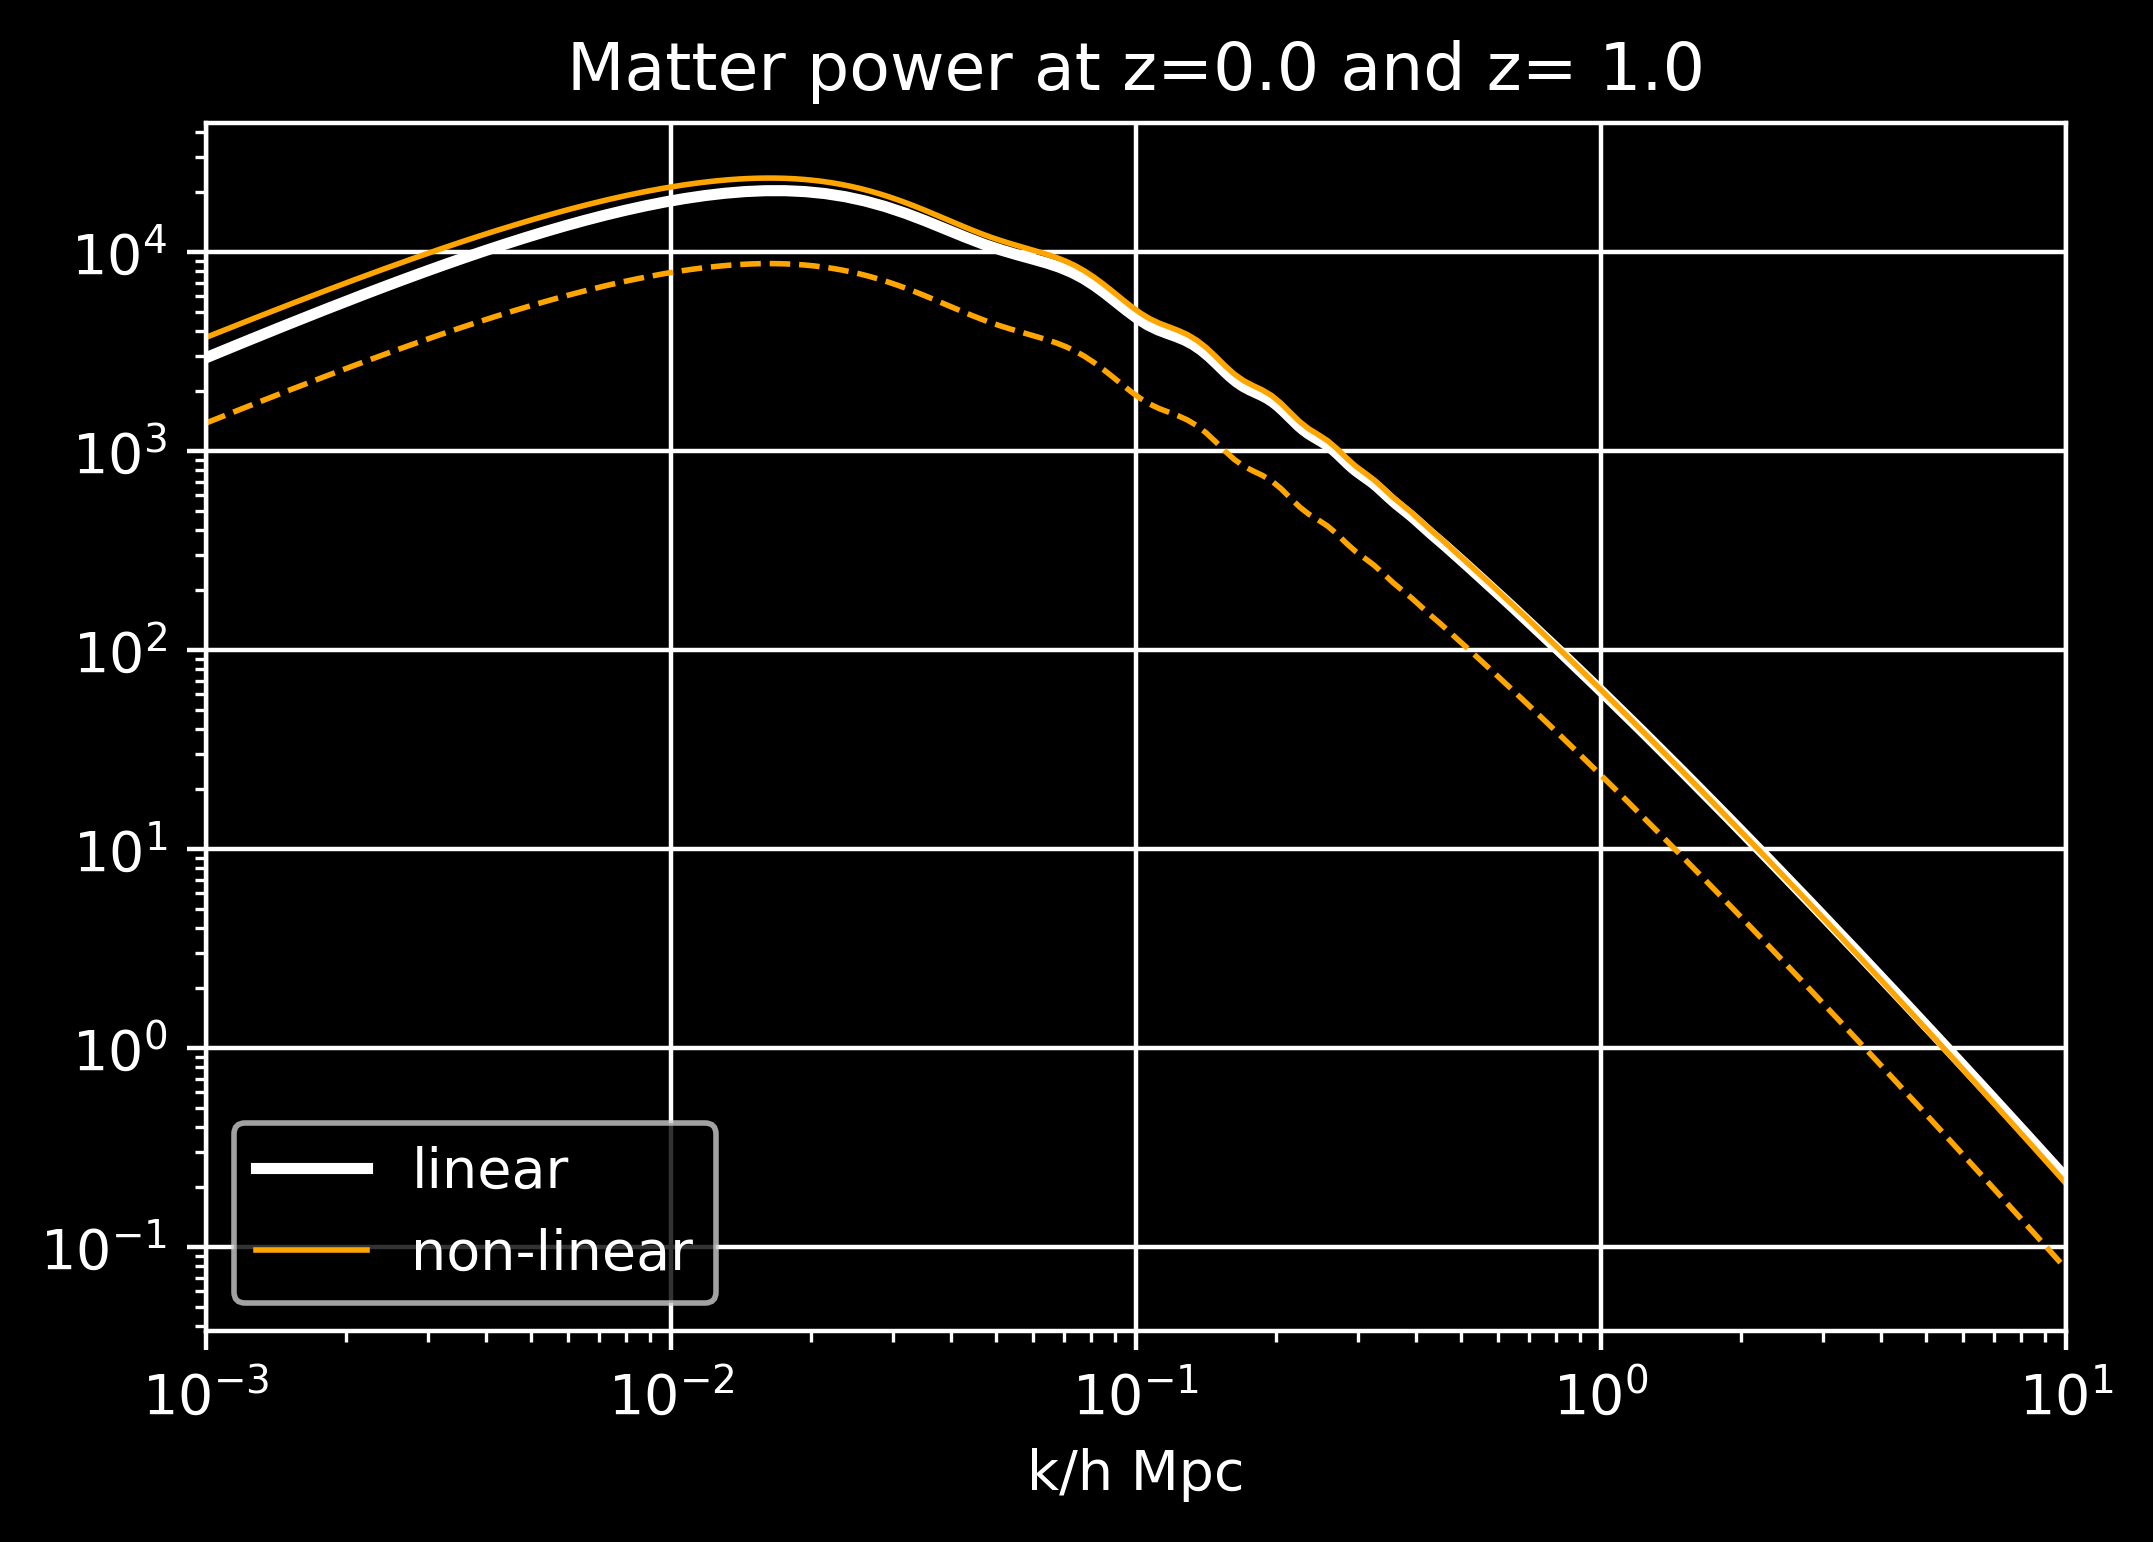

In [21]:
plt.figure(dpi=200)
primordial_PK = results.Params.scalar_power(1)
plt.loglog(trans.transfer_data[0,:,-1], primordial_PK**1 * cos_pars.h**4*(2*np.pi**2) *trans.transfer_data[6,:,-1]**2*trans.transfer_data[0,:,-1]**1, color='white', lw=2)

for i, (redshift, line) in enumerate(zip(z,['-','--'])):
    plt.loglog(kh, pk[i,:], color='orange', ls = line, lw=1)
#     plt.loglog(kh_nonlin, pk_nonlin[i,:], color='cyan', ls = line, lw=1)
plt.xlabel('k/h Mpc');
plt.legend(['linear','non-linear'], loc='lower left');
plt.title('Matter power at z=%s and z= %s'%tuple(z));
plt.xlim(1e-3,1e1)
plt.grid('both')
# plt.ylim(5e-1,1e6)

In [22]:
primordial_PK = results.Params.scalar_power(1)

In [23]:
primordial_PK

1.8155437835832668e-09

In [24]:
trans.transfer_d

AttributeError: 'MatterTransferData' object has no attribute 'transfer_d'

In [25]:
from gadget_tools import Snapshot
from fitting_fns import halofit

In [26]:
i=200
simdir = '/scratch/aseem/sims/bdm_cdm1024/r1/'

In [27]:
snap = Snapshot(os.path.join(simdir, f'snapshot_{i:03d}.0'))

reading the first block (header) which contains  [256]  bytes
Header block is read and it contains  256 bytes.


In [28]:
power_spec_existing = pd.read_csv(os.path.join(simdir, f"Pk_{i:03d}.txt"),comment='#', sep='\t',names=['k','pk','ph','pcross'])

In [29]:
transfer_func_file = '/mnt/home/faculty/caseem/config/transfer/classTf_om0.14086_Ok0.0_ob0.02226_h0.6781_ns0.9677.txt'

transfer_df = pd.read_csv(transfer_func_file, sep='\s+',header=None)

def Omega(z, Om0):
    E = Om0 * (1+z)**3 + (1-Om0)
    return Om0 * (1+z)**3 / E

def D1(z, Om0):
    Om_m = Omega(z, Om0)
    Om_L = 1 - Om_m
    return 5/2* 1/(1+z) * Om_m / (Om_m**(4/7) - Om_L + (1+Om_m/2)*(1+Om_L/70))

k_full = transfer_df[0]
pk_lin = transfer_df[1]**2*transfer_df[0] * (D1(snap.redshift, snap.Omega_m_0)/ D1(0, snap.Omega_m_0))**2

In [30]:
pk_fit = halofit.NonLinPowerSpecCDM(Omega(snap.redshift, snap.Omega_m_0))
pk_fit.set_Del2L_interpolate(k_full, pk_lin)
pk_fit.compute_params()
print(vars(pk_fit))

{'Om_m': 0.30633750000000026, 'Del2L': <scipy.interpolate.interpolate.interp1d object at 0x2b3b08dd47c0>, 'k_range': array([2.07789362e-07, 9.99025700e+01]), 'k_sig': 0.37733919739074273, 'neff': -1.73233174746789, 'C': 0.3355738895477589, 'a_n': 2.319642058113703, 'b_n': 0.4130950160839184, 'c_n': 0.30282582895411886, 'gamma_n': 0.6270310768689471, 'alpha_n': 1.3241109708293461, 'beta_n': 1.2939921482712635, 'mu_n': 0, 'nu_n': 0.0657429799375396}


/mnt/home/student/cprem/project-alpha-peak/code/library/fitting_fns/halofit.py:26: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._get_integ_sig(R), *np.log(self.k_range))[0]
/mnt/home/student/cprem/project-alpha-peak/code/library/fitting_fns/halofit.py:37: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one w

In [40]:
input_power_spec = pd.read_csv('/scratch/cprem/sims/my-bdm_cdm512_p18/input_powerspec.txt', sep='\s+', comment='#', usecols=[0,1], names=['k','pk'])

In [41]:
# transfer_func_file = '/mnt/home/faculty/caseem/config/transfer/classTf_om0.14086_Ok0.0_ob0.02226_h0.6781_ns0.9677.txt'
# transfer_df = pd.read_csv(transfer_func_file, sep='\s+',header=None)
k_full_init = transfer_df[0]
pk_lin_init = transfer_df[1]**2*transfer_df[0] * (D1(99, snap.Omega_m_0)/ D1(0, snap.Omega_m_0))**2

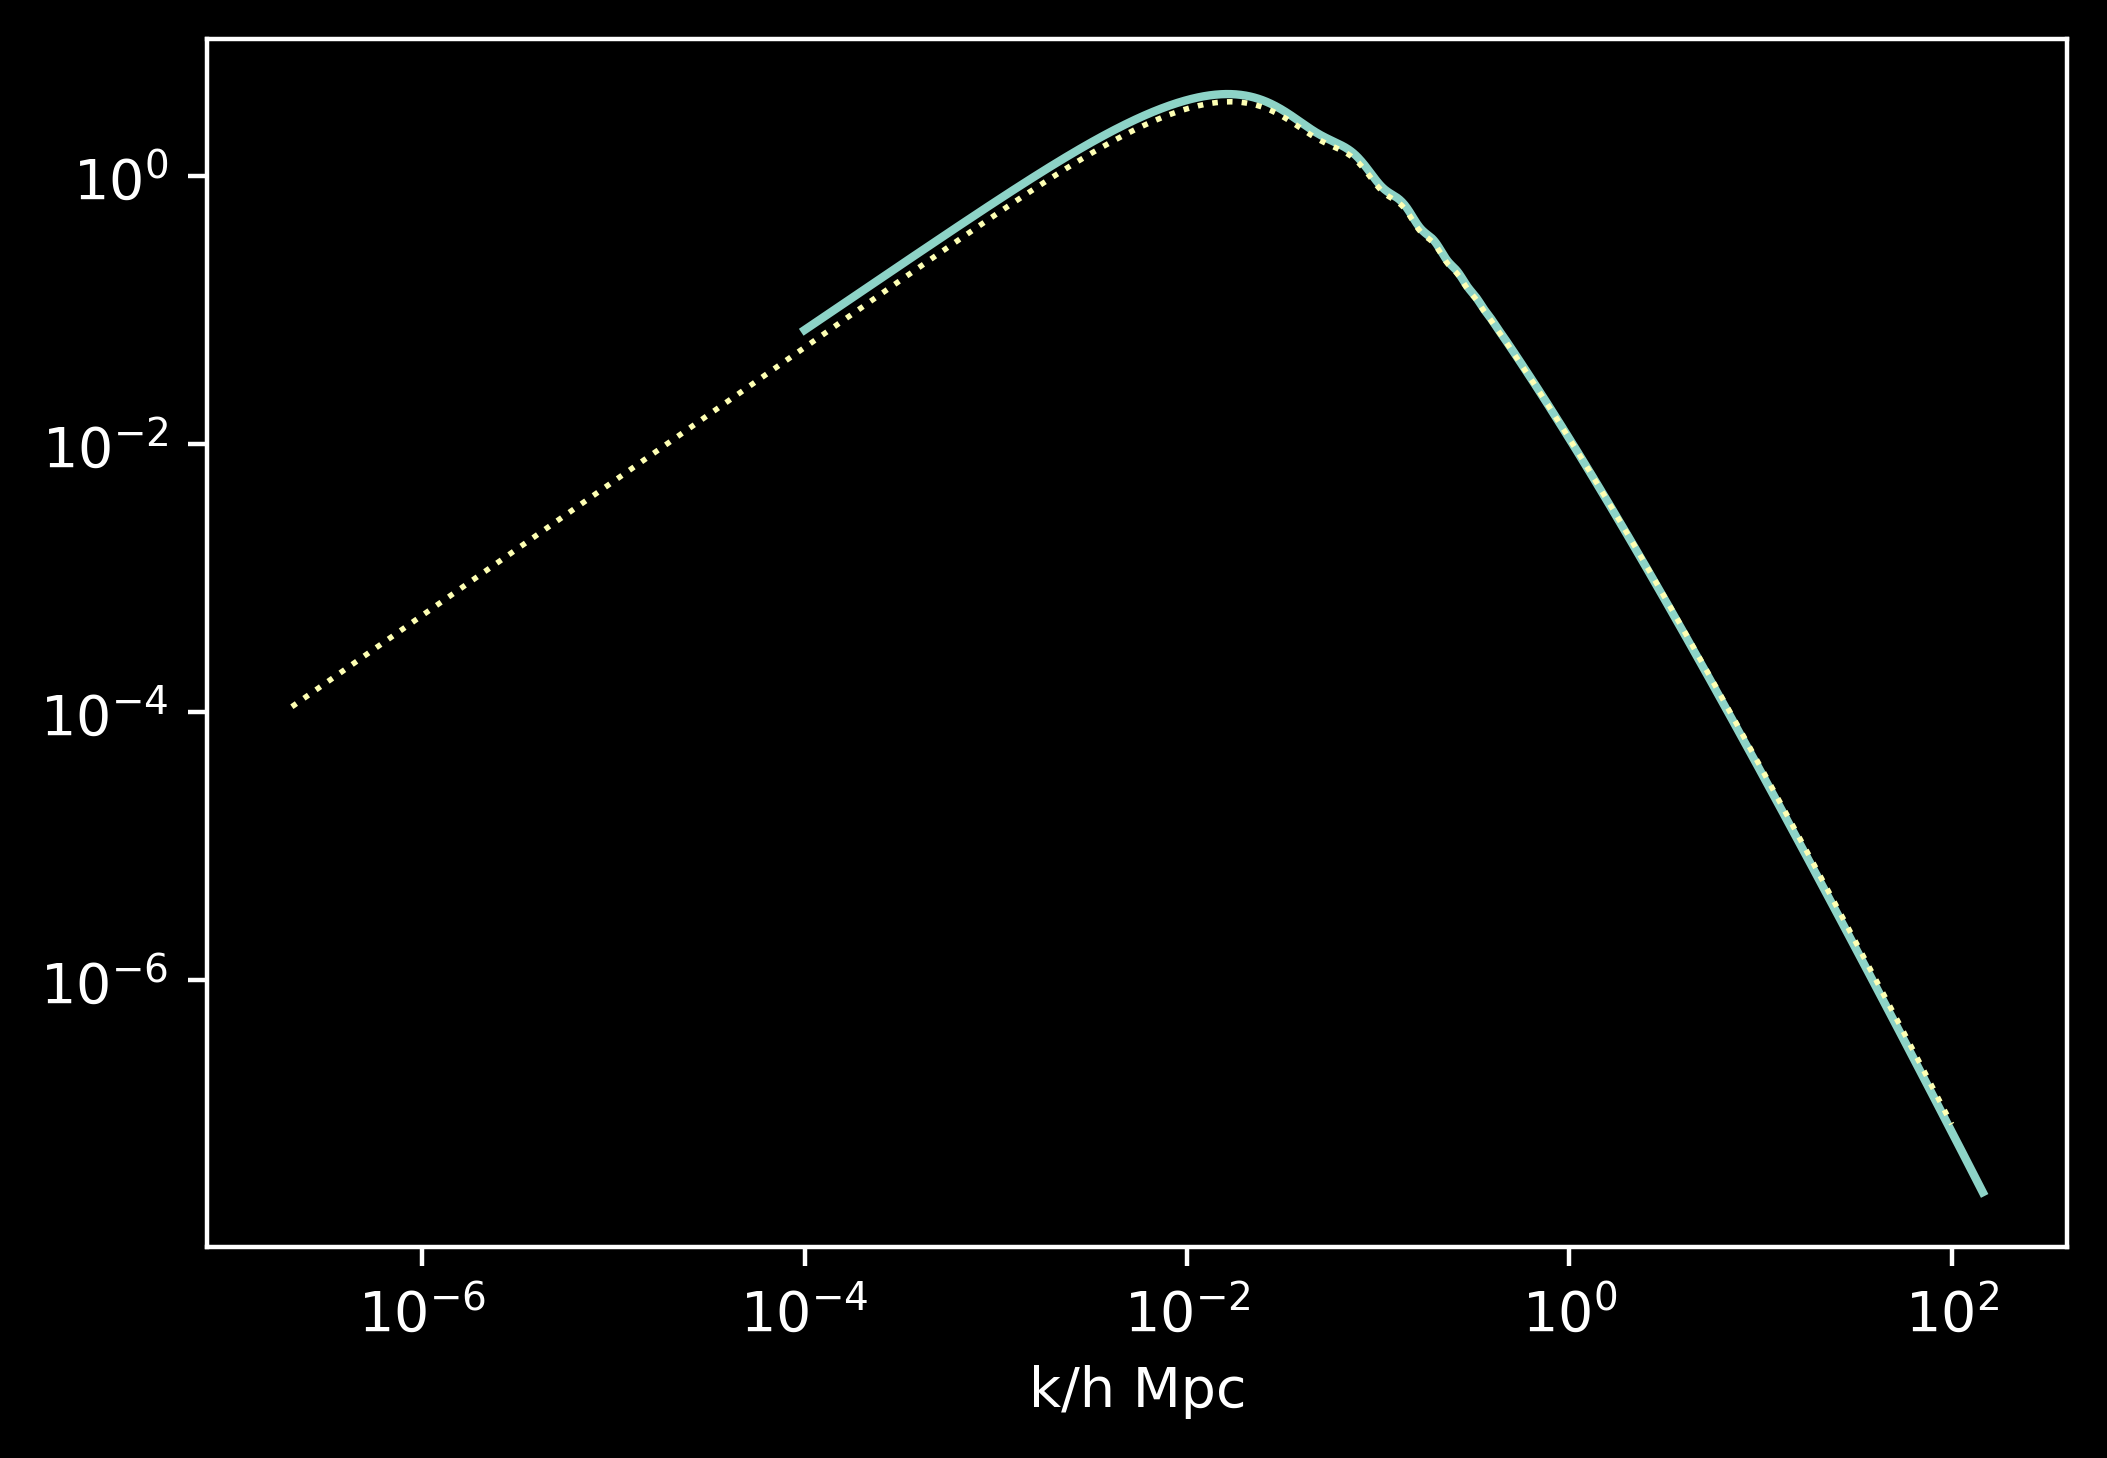

In [42]:
fig2, ax2 = plt.subplots(1, dpi=200)
ax2.plot(input_power_spec['k'], input_power_spec['pk']*8*np.pi**3)
ax2.plot(k_full_init, pk_lin_init, linestyle='dotted', label='linear theory', lw=1)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('k/h Mpc');

(0.1, 20000.0)

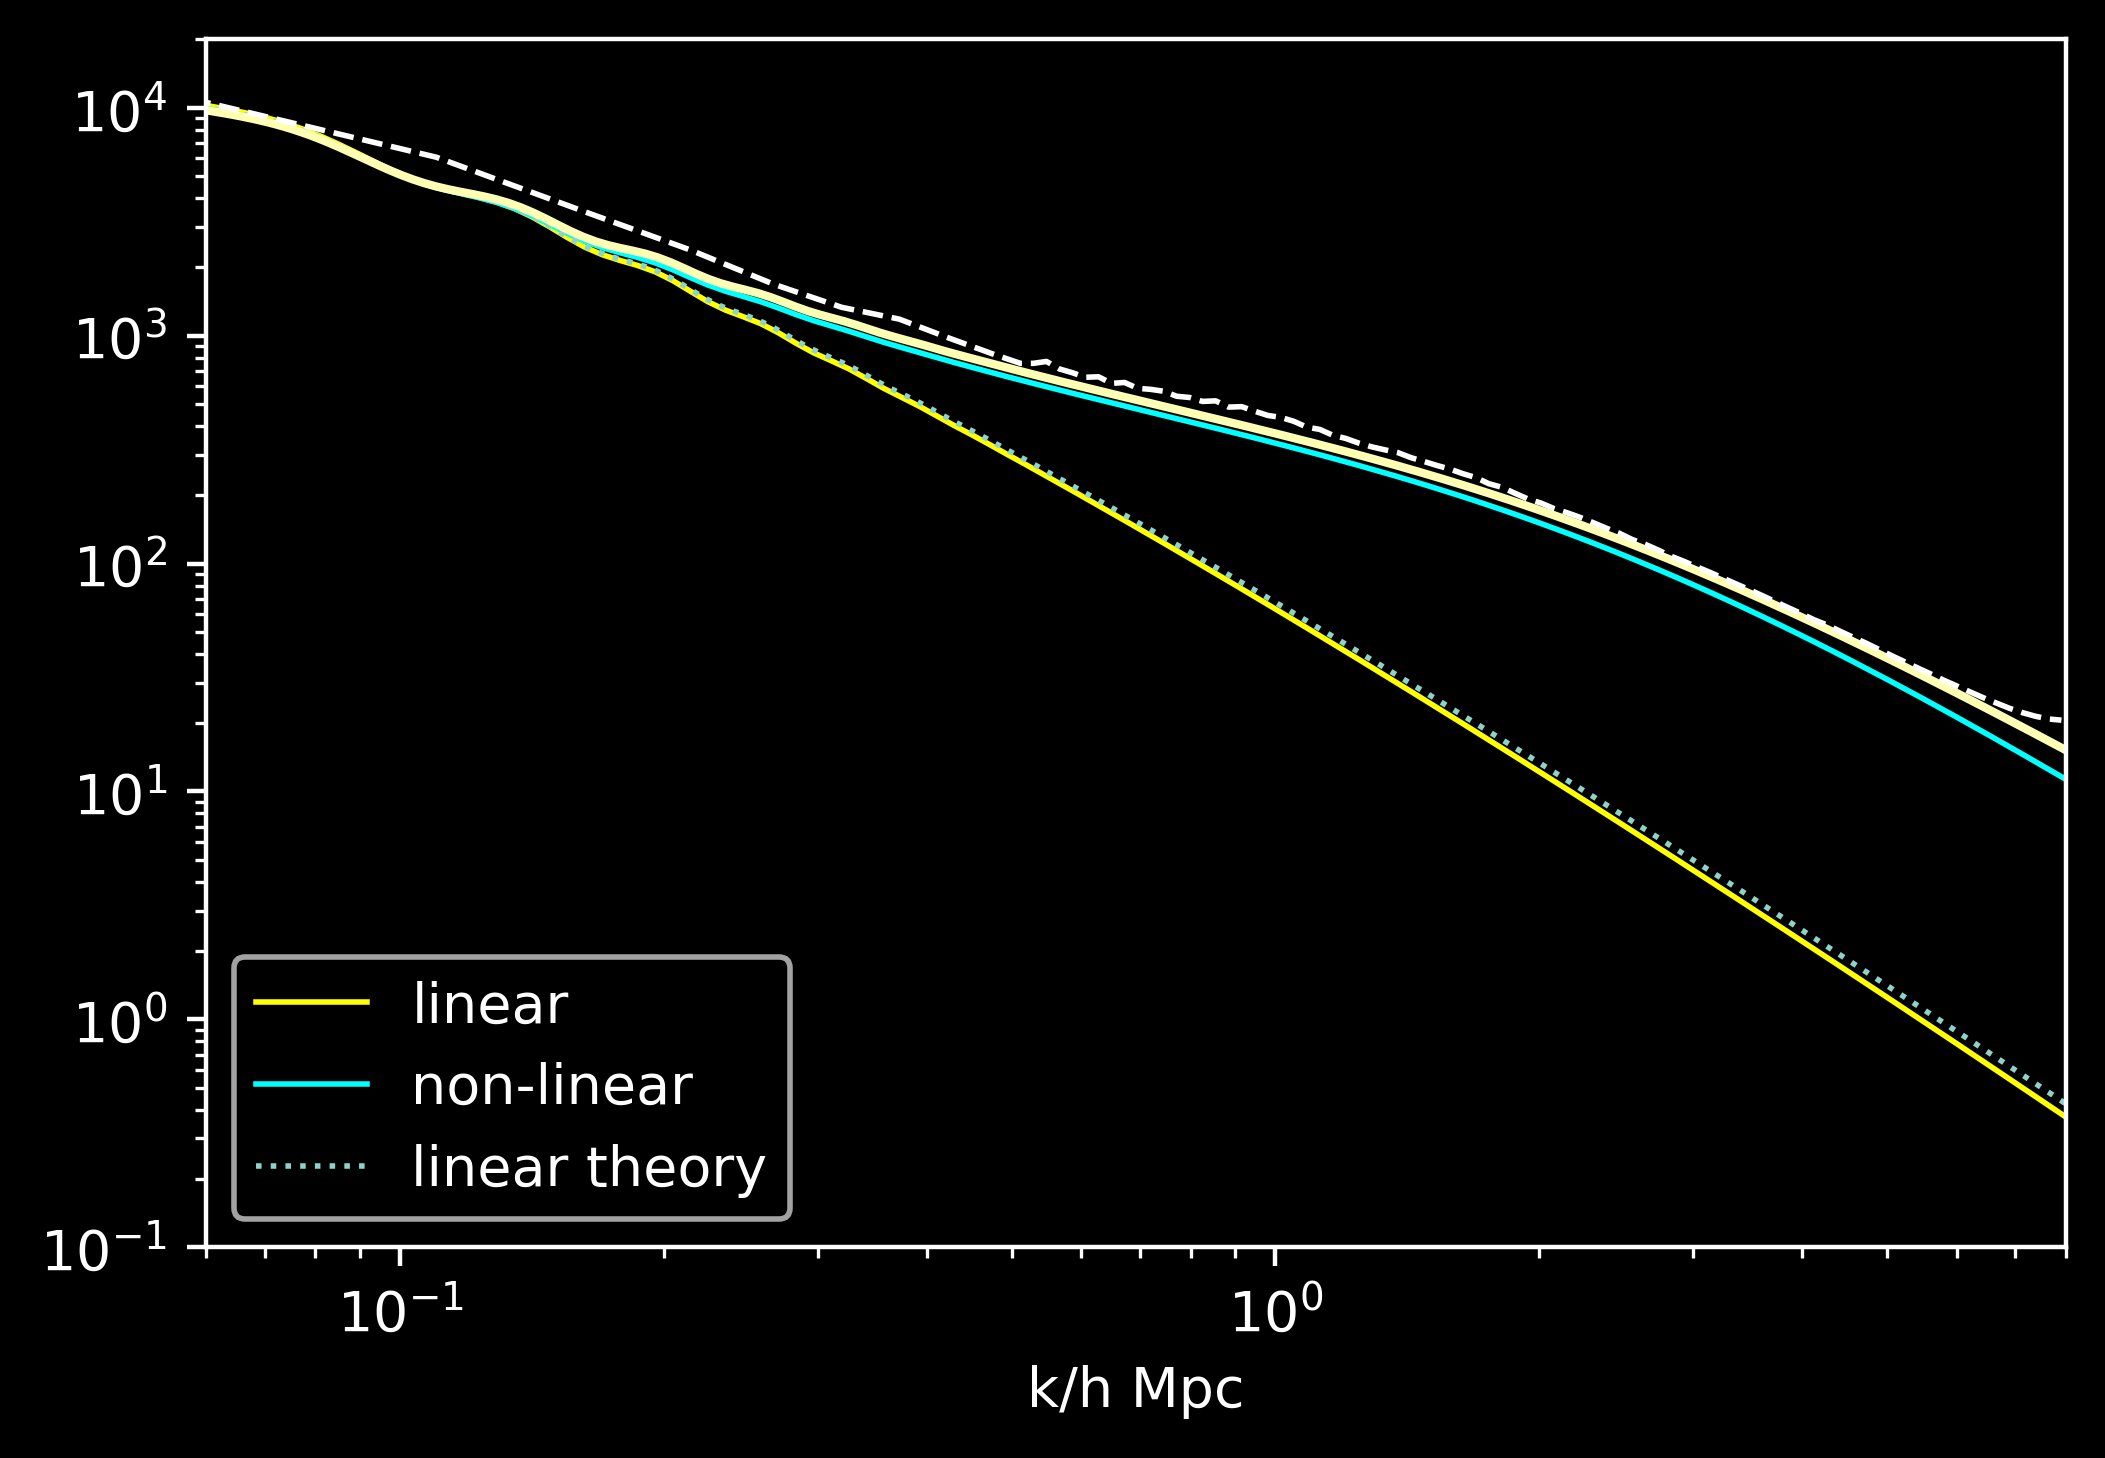

In [43]:
fig2, ax2 = plt.subplots(1, dpi=200)
ax2.loglog(kh, pk[0,:], color='yellow', ls = '-', lw=1)
ax2.loglog(kh_nonlin, pk_nonlin[0,:], color='cyan', ls = '-', lw=1)
ax2.plot(k_full, pk_lin, linestyle='dotted', label='linear theory', lw=1)
ax2.plot(k_full, pk_fit.P(k_full), label='Halofit model')
power_spec_existing.plot('k','pk', loglog=True, ax=ax2, color='white', linestyle='dashed', lw=1)
ax2.set_xlabel('k/h Mpc');
plt.legend(['linear','non-linear', 'linear theory'], loc='lower left');
ax2.set_xlim(6e-2,8e0)
ax2.set_ylim(1e-1,2e4)

In [32]:
from astropy import cosmology

In [33]:
p13_cosmo = cosmology.Planck13
p18_cosmo = cosmology.Planck18

In [34]:
p13_cosmo.Om0

0.30712

In [35]:
p18_cosmo.Om0

0.30966

In [36]:
p18_cosmo.Ode0

0.6888463055445441

In [37]:
from gadget_tools import Snapshot

In [38]:
snap = Snapshot('/scratch/aseem/sims/bdm_cdm1024/r1/snapshot_000.0')

reading the first block (header) which contains  [256]  bytes
Header block is read and it contains  256 bytes.


In [39]:
snap.Omega_m_0

0.3063375

In [40]:
snap.Hubble_param

0.6781

In [41]:
from astropy import units

In [42]:
H100 = 100* units.km / units.s / units.Mpc

In [43]:
(H100**-1).to(units.yr)

<Quantity 9.77792222e+09 yr>

In [44]:
p18_cosmo.h

0.6766

In [45]:
p18_cosmo.h

0.6766

In [46]:
snap.Omega_Lam_0+snap.Omega_m_0

1.0

In [47]:
plt.rcParams['lines.markersize']

6.0